Analysis of fitness results generated by the different algorithms

In [4]:
# Libraries and helper functions
import pickle
import json
import sys
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def get_config(file='config.json'):
    with open(file) as cfg_file:  
     return json.load(cfg_file)
        
def get_ga_results(cfg):
    return pd.concat((pd.read_csv(
                    cfg['ga']['base_results_file_path'] + f + '/average_fitness.csv'
                    ) for f in cfg['data']['files'])).reset_index().drop('index',1)

def get_pso_results(cfg):
    pso_fitnesses = []
    for f in cfg['data']['files']:
        p = cfg['pso']['base_results_file_path'] + f + '/pickles/average_fitness.pickle'
        pso_fitnesses.append(pickle.load(open(p,"rb")))
    return pd.DataFrame(pso_fitnesses)    

def get_csfla_results(cfg):
    fs = []
    for f in cfg['data']['files']:
        p = cfg['csfla']['base_results_file_path'] + f + '/pickles/average_fitness.pickle'
        fs.append(pickle.load(open(p,"rb")))
    return pd.DataFrame(fs)

In [5]:
# Load data
cfg = get_config()
#ga_df = get_ga_results(cfg)
pso_df = get_pso_results(cfg)
#csfla_df = get_csfla_results(cfg)

FileNotFoundError: [Errno 2] No such file or directory: 'results/pso/data/fx-spot_EUR_GBP_10min_201306.txt:fx-spot_EUR_GBP_10min_201306:02:20:21:28/pickles/average_fitness.pickle'

In [3]:
# Peek 
pso_df.head()

,mdd,no_of_short_selling_transactions,no_of_transactions,noop,realised_profit,ret,u_buy,u_sell,value,wealth
0,0.001430,0,27.0,2191.0,4.967020,0.000993,0.0,0.0,0.000707,500004.967020
1,0.001430,0,27.0,2191.0,4.967020,0.000993,0.0,0.0,0.000707,500004.967020
2,0.000534,0,13.0,2336.0,-1.723563,-0.000345,0.0,0.0,-0.000451,499998.276437


NameError: name 'csfla_df' is not defined

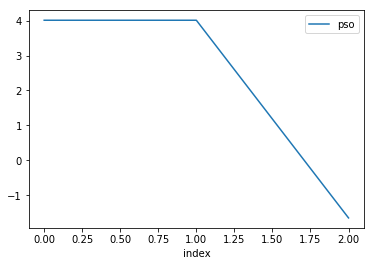

In [4]:
ax = pso_df.reset_index().plot(x='index', y='realised_profit', label="pso")
ax = csfla_df.reset_index().plot(x='index', y='realised_profit', label='csfla', ax=ax)
plt = ga_df.reset_index().plot(x='index', y='realised_profit', label='ga', ax=ax)

plt.set_xlabel("Month")
plt.set_ylabel("Realised profit")


NameError: name 'csfla_df' is not defined

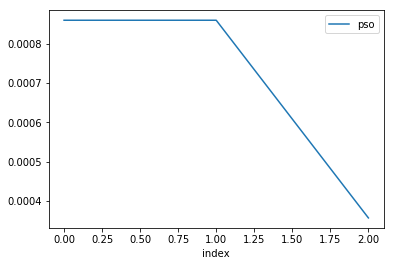

In [5]:
ax = pso_df.reset_index().plot(x='index', y='mdd', label="pso")
ax = csfla_df.reset_index().plot(x='index', y='mdd', label='csfla', ax=ax)
plt = ga_df.reset_index().plot(x='index', y='mdd', label='ga', ax=ax)

plt.set_xlabel("Month")
plt.set_ylabel("Maximum Draw Down")

We could deduce a couple of points form these graphs:

    -PSO & CSFLA seem correlated especially in terms of fitness
    
    -PSO seems to yield more risk-taking strategies than CSFLA
        Mdd is higher on average
        
    -PSO can be extremely volatile in the last month (due to an outlier of very low fitness)
        
    -PSO/CSFLA & GA seem complimentary in some months in terms of fitness eg months 6-8
        Maybe an ensemble would be interesting
        
    

In [20]:
pso_no_last_month = pso_df.drop(pso_df.index[11])
csfla_no_last_month = csfla_df.drop(csfla_df.index[11])
ga_no_last_month = ga_df.drop(ga_df.index[11])

print("Mean realised profits, not counting the last month:")
print(pso_no_last_month['realised_profit'].mean())
print(csfla_no_last_month['realised_profit'].mean())
print(ga_no_last_month['realised_profit'].mean())

-0.17069083453970943
-0.5354225393153628
-1.4856156363636364


In [24]:
print(pso_df['mdd'].mean())
print(csfla_df['mdd'].mean())
print(ga_df['mdd'].mean())

0.001051731496210451
0.0004316631033018617
0.0008705833333333331
